In [62]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading data

Train and Test Data is loaded and being cross-checked.

In [122]:
train_data = pd.read_csv('train.csv')
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
test_data = pd.read_csv('test.csv')
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Summerizing the Data Set

In [124]:
# how many rows and columns?

train_data.shape

(891, 12)

In [125]:
#how many survived and how many died?

train_data.groupby ('Survived').size()

Survived
0    549
1    342
dtype: int64

# Data Modelling

In [126]:
train_data.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


<AxesSubplot: >

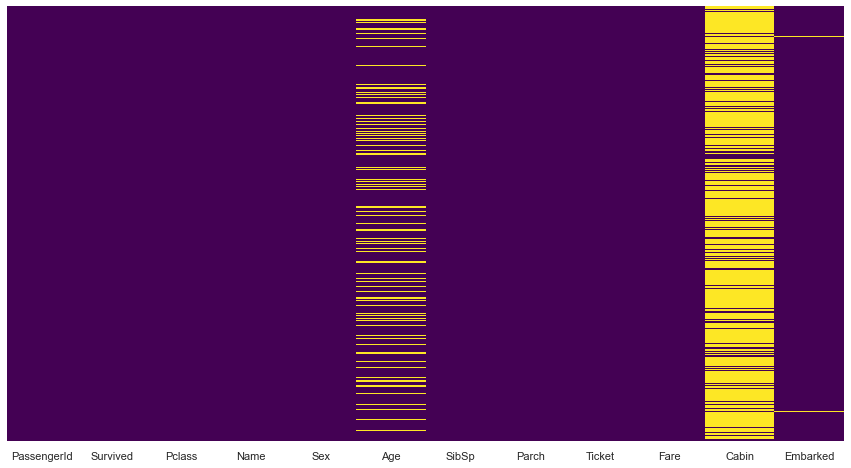

In [127]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

###### If we glimpse at the data, we are having multiple missing information mainly,  age information,  a lot of cabin info and we're missing one row of embarked. We'll come back to this problem of missing data a little later datacleansing part. But before that lets focus on some exploratory data analysis on a visual level.

<AxesSubplot: xlabel='count', ylabel='Survived'>

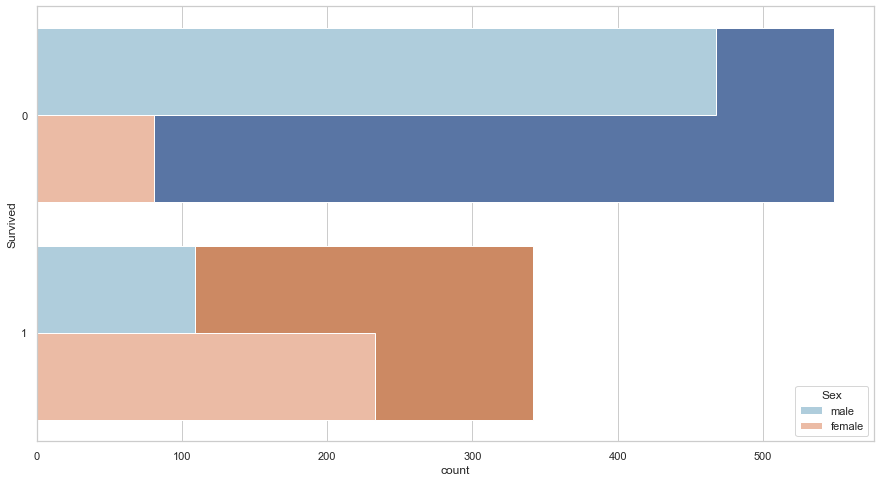

In [128]:
sns.set_style('whitegrid')
sns.countplot(y='Survived',data=train_data)
sns.countplot(y='Survived',data=train_data,hue='Sex',palette='RdBu_r')

###### As we can see we clearly have a trend here. It looks like people that did not survive were much more likely to be men. While those who survived were twice as likely to be female

<AxesSubplot: xlabel='count', ylabel='Survived'>

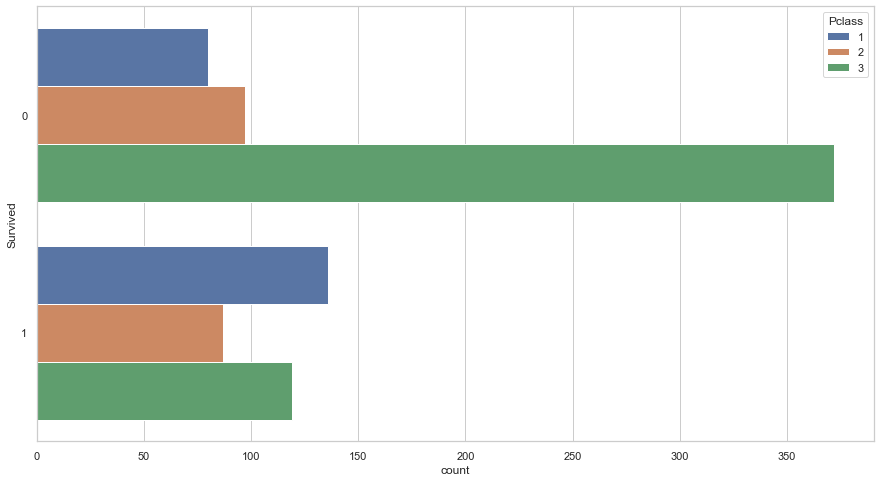

In [129]:
sns.countplot(y='Survived',data=train_data,hue='Pclass')

###### Also it looks like the people who did not survive were overwhelmingly part of 3rd class. People that did survive were from the higher classes. Now lets try and understand the age of the onboard passengers.

<AxesSubplot: xlabel='Age'>

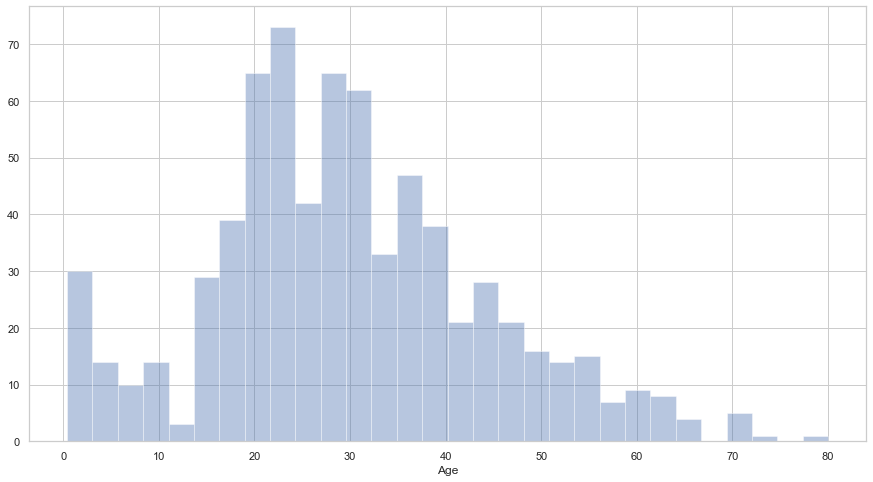

In [130]:
sns.distplot(train_data['Age'].dropna(),bins=30,kde=False)

###### There seems to be an interesting bi-modal distribution where there are quite a few young passengers between age 0 and 10. Then the average age tends to be around 20-30.

<AxesSubplot: xlabel='count', ylabel='SibSp'>

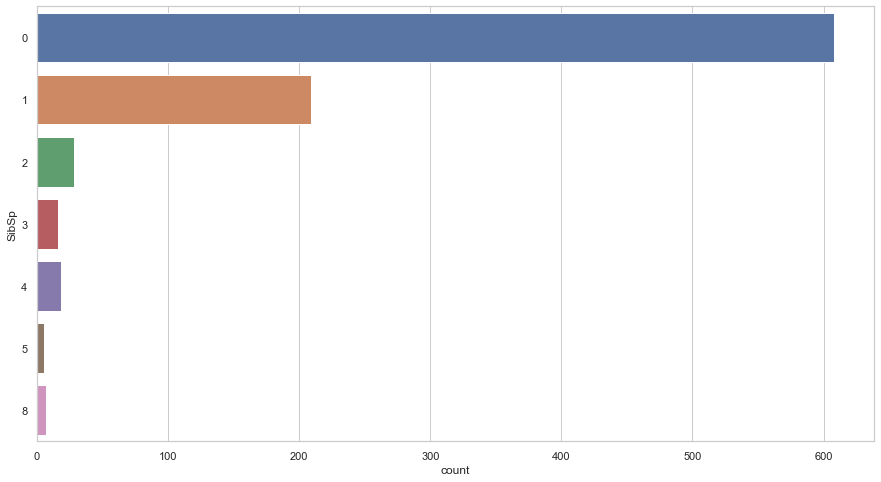

In [131]:
sns.countplot(y='SibSp',data=train_data)

<AxesSubplot: >

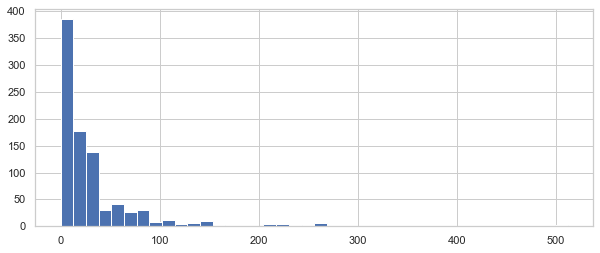

In [132]:
train_data['Fare'].hist(bins=40,figsize=(10,4))

# Data Cleaning

###### As per the given data we have missing values in Age, cabin and embarked 
###### column. We wont be considering cabin column anymore. Here we will be carrying 
###### out Data cleansing by droping cabin and replacing the missing values in 
###### other two column with mean vales.

###### Hence we will drop Ticket, Fare and Cabin as they are not helpful in this regard.

In [133]:
to_drop = ['PassengerId',
           'Ticket',
           'Fare',
           'Cabin',
           'Embarked',
           'Name']

train_data.drop(to_drop, inplace=True, axis=1)

In [134]:
to_drop = ['Ticket',
           'Fare',
           'Cabin',
           'Embarked',
           'Name']

test_data.drop(to_drop, inplace=True, axis=1)

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

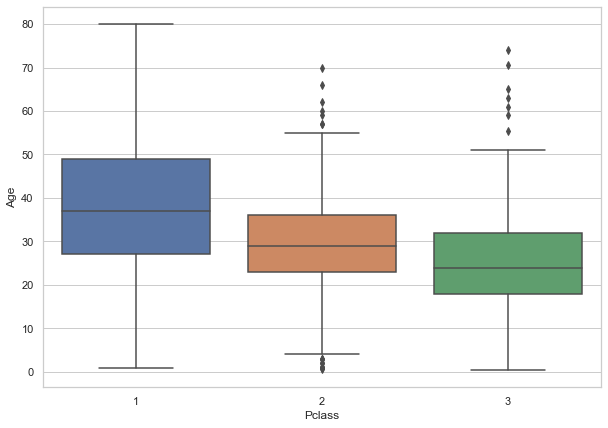

In [135]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train_data)

###### Filling all the empty values with mean of the column. 

###### same to do with both Train and Test cases.

In [136]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

print(train_data)

     Survived  Pclass     Sex        Age  SibSp  Parch
0           0       3    male  22.000000      1      0
1           1       1  female  38.000000      1      0
2           1       3  female  26.000000      0      0
3           1       1  female  35.000000      1      0
4           0       3    male  35.000000      0      0
..        ...     ...     ...        ...    ...    ...
886         0       2    male  27.000000      0      0
887         1       1  female  19.000000      0      0
888         0       3  female  29.699118      1      2
889         1       1    male  26.000000      0      0
890         0       3    male  32.000000      0      0

[891 rows x 6 columns]


In [137]:
train_data.replace({'Sex' : {'male':0, 'female':1}}, inplace = True)

train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


In [168]:
train_data.loc[ train_data['Age'] <= 16, 'Age'] = 0
train_data.loc[(train_data['Age'] > 16) & (train_data['Age'] <= 32), 'Age'] = 1
train_data.loc[(train_data['Age'] > 32) & (train_data['Age'] <= 48), 'Age'] = 2
train_data.loc[(train_data['Age'] > 48) & (train_data['Age'] <= 64), 'Age'] = 3
train_data.loc[ train_data['Age'] > 64, 'Age']                           = 4

In [139]:

x = train_data.drop("Survived", axis = 1)
y = train_data['Survived']

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


In [140]:
test_data.loc[ train_data['Age'] <= 16, 'Age'] = 0
test_data.loc[(train_data['Age'] > 16) & (test_data['Age'] <= 32), 'Age'] = 1
test_data.loc[(train_data['Age'] > 32) & (test_data['Age'] <= 48), 'Age'] = 2
test_data.loc[(train_data['Age'] > 48) & (test_data['Age'] <= 64), 'Age'] = 3
test_data.loc[ train_data['Age'] > 64, 'Age']    

Series([], Name: Age, dtype: float64)

In [141]:
test_data.replace({'Sex' : {'male':0, 'female':1}}, inplace = True)

test_data.info()
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 19.7 KB


,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,0,0.0,0,0
1,893,3,1,0.0,1,0
2,894,2,0,0.0,0,0
3,895,3,0,0.0,0,0
4,896,3,1,0.0,1,1


### Logistic Regression

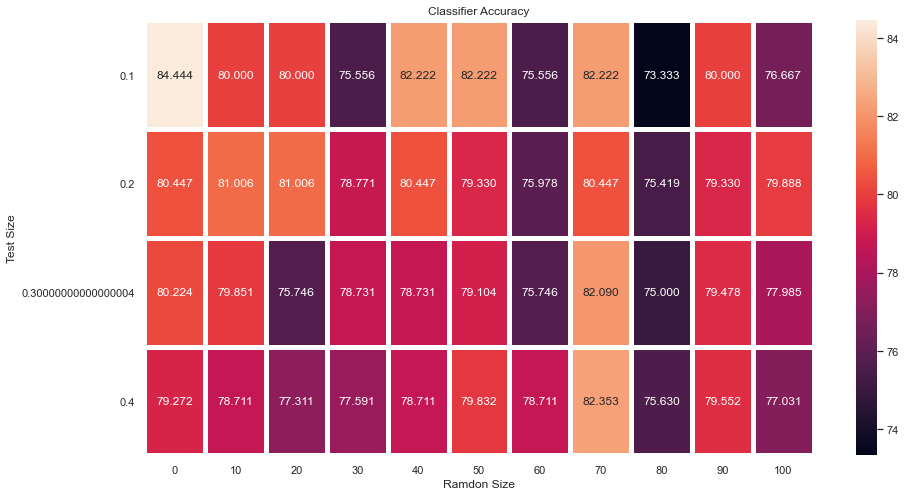

In [142]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

t_s = np.linspace(0.1,0.4,4)
r_s = np.linspace(0,100,11).astype(int)


log_cols = ["Test Size", "Ramdon Size", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

n_splits = 10
acc_dict = {}

for i in t_s:
    for j in r_s:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = i, random_state = j)
        x_train.shape, x_test.shape
        logreg = LogisticRegression()
        logreg.fit(x_train, y_train)
        predictions = logreg.predict(x_test)
        acc = accuracy_score(y_test, predictions)
        #print(classification_report(y_test, predictions))
        #print(logreg.score(x_train,y_train))
        #print(logreg.score(x_test,y_test))
        #train_pred = train_pred.append(logreg.score(x_train,y_train))
        #test_pred = test_pred.append(logreg.score(x_test,y_test))
        
        
        
        if i in acc_dict:
            if j in acc_dict[i]:
                acc_dict[i][j] += acc
            else:
                acc_dict[i][j] = acc
        else:
            acc_dict[i] = {}
            acc_dict[i][j] = acc
            
        #print(acc_dict)

for i in acc_dict:
    for j in acc_dict[i]:
        acc_value = acc_dict[i][j] / n_splits * 1000
        log_entry = pd.DataFrame([[i, j, acc_value]], columns=log_cols)
        log = log.append(log_entry)
        
#print(log)

#plt.scatter(i, acc_value)

#plt.show()

plt.figure()

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

heatmap_data = log.pivot("Test Size", "Ramdon Size", "Accuracy")
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.heatmap(heatmap_data, annot=True, linewidths=5, fmt='0.3f')

<AxesSubplot: >

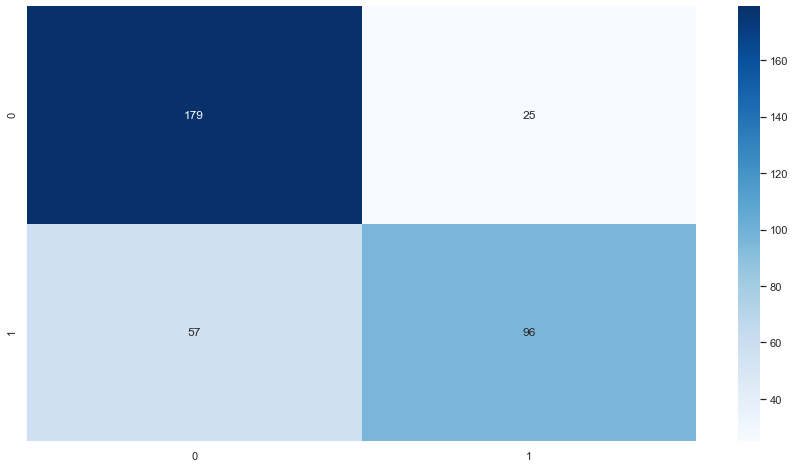

In [143]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot = True, cmap = 'Blues', fmt = 'd')

In [144]:
logreg.score(x_train,y_train)

0.8277153558052435

In [145]:
logreg.score(x_test,y_test)

0.7703081232492998

### Cross-validation

In [146]:
from sklearn.model_selection import cross_validate

scores = cross_validate(logreg, x, y, scoring='accuracy', cv=10)
print(scores['test_score'])

[0.8        0.79775281 0.74157303 0.79775281 0.79775281 0.7752809
 0.7752809  0.75280899 0.80898876 0.80898876]


In [147]:
scores = pd.Series(scores)
print(scores.test_score.mean())

0.7856179775280899


### Support Vector Model

In [148]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)
print(svm.score(x_train, y_train))
print(svm.score(x_test, y_test))

0.8352059925093633
0.7927170868347339


## Making Predictions

##### Here we are taking out Passenger Id from the table as we need it to predict who survived and who died. In the final prediction we are having two columns having Passenger ID, Survived.

In [163]:
test_x = test_data.drop('PassengerId',axis=1)

In [164]:
predictions = logreg.predict(test_x)

In [165]:
final_prediction = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':predictions})

In [166]:
final_prediction.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<AxesSubplot: xlabel='count', ylabel='Survived'>

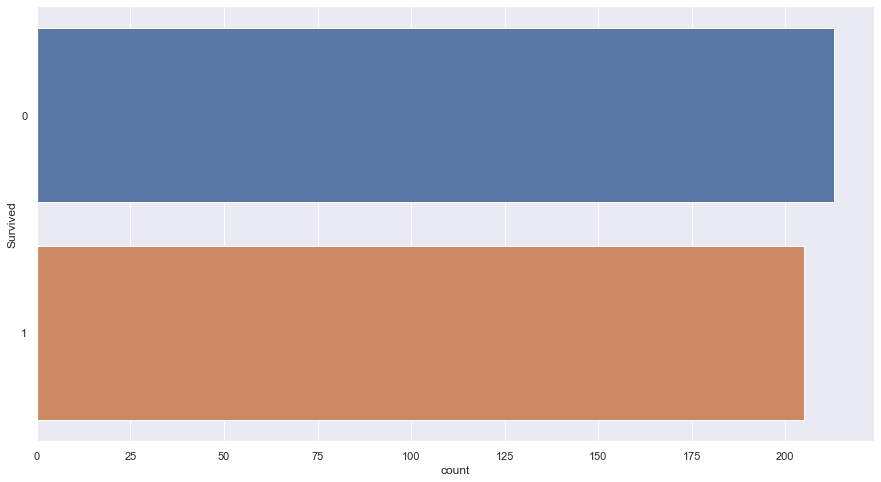

In [167]:
sns.countplot(y='Survived',data=final_prediction)

In [169]:
final_prediction


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [170]:
x,y = final_prediction['Survived'].value_counts()
print(x,y)

213 205


### As per the results 202 survided and 216 died. Hence, survibility rate is : 48%

In [171]:
final_prediction.to_csv("submission.csv", index=None)

In [172]:
pd.read_csv("submission.csv")

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
